# PEC 3 Support Vector Machine

### Raúl Pérez Prats

### 02/06/2024

## Tabla de Contenidos

### 1. [Algoritmo Support Vector Machine](#1)
### 2. [Análisis descriptivo de breast_cancer.csv](#2)
### 3. [Implementación SVM](#3)
###          [a) Partición del dataset](#4)
###          [b) Utilización del kernel lineal y el kernel RBF](#5)
###          [c) Implementación SVM con kernel lineal y 3-fold crossvalidation](#6)
###          [d) Evaluar el rendimiento del algoritmo SVM con kernel RBF para diferentes valores de los hiperparámeteros C y sigma](#7)
###          [e) Tabla resumen de los diferentes modelos y sus rendimientos](#8)
###          [f) SVM coordenadas PCA](#9)

## Algoritmo Support Vector Machine <a class="anchor" id="1"></a>

El algoritmo de Support Vector Machine (SVM) es una técnica de aprendizaje supervisado utilizada habitualmente para tareas de clasificación, aunque tambien se puede aplicar a problemas de regresión. Su principal objetivo es identificar el hiperplano que mejor divide las clases en el espacio de características.

Un SVM lineal intenta encontrar un hiperplano en un espacio N-dimensional (donde N es el número de características) que separe las clases de datos. Para datos linealmente separables, el SVM identifica el hiperplano que maximiza el margen, es decir, la distancia entre el hiperplano y los puntos de datos más cercanos de cada clase, conocidos como vectores de soporte. 

El objetivo es localizar el hiperplano con el mayor margen posible, resolviendo esto como un problema de optimización convexa para maximizar la distancia mínima de los puntos de datos a este hiperplano. Los puntos de datos más cercanos al hiperplano, llamados vectores de soporte, son los que determinan su posición, y cualquier modificación en estos puntos afectaría la ubicación del hiperplano. 

Para datos que no son linealmente separables en el espacio original de características, SVM utiliza una técnica conocida como "kernel trick". Un kernel es una función que transforma los datos a un espacio de características de mayor dimensión, donde es más sencillo encontrar un hiperplano separador.

En la siguiente imágen tenemos una ilustración en la que podemos apreciar el hiperplano, el margen máximo y los vectores de soporte para un caso en particular:

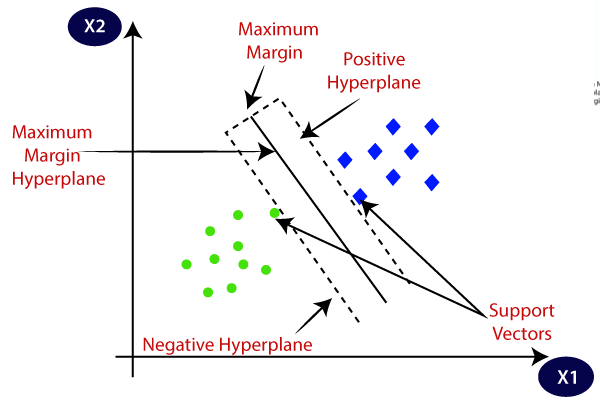

| **Fortalezas** | **Debilidades** |
| --- | --- |
| Efectivo en espacios de alta dimensión | No es eficiente con grandes conjuntos de datos debido a su complejidad computacional |
| Funciona bien con un número de dimensiones mayor que el número de muestras | Elegir el kernel correcto puede ser complicado |
| Usa un subconjunto de puntos de entrenamiento (vectores de soporte) en la función de decisión, lo que lo hace eficiente en memoria | El tiempo de entrenamiento puede ser alto |
| Puede manejar tanto datos lineales como no lineales a través del uso de kernels | Es sensible a los valores de los parámetros de regularización y del kernel, lo que requiere ajuste cuidadoso |
| Buena precisión y capacidad para modelar relaciones complejas en los datos | Puede tener problemas con datos ruidosos o solapados donde las clases no son bien separables |


## Análisis descriptivo de breast_cancer.csv <a class="anchor" id="2"></a>

In [65]:
import pandas as pd

df = pd.read_csv('breast_cancer.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave.points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave.points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [66]:
variables = df.columns
print(f'El dataset tiene {df.shape[0]} muestras con {len(variables)} variables que incluyen: {variables}')

print("\nResúmen estadístico de las variables:")
print(df.describe())

print("\nComprobamos si existen valores nulos:")
print(df.isnull().sum())

El dataset tiene 569 muestras con 32 variables que incluyen: Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave.points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave.points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave.points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

Resúmen estadístico de las variables:
                 id  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  5.690000e+02   569.000000    569.000000      569.000000   569.000000   
mean   3.037183e+07    14.127292     19.289649       91.969033   654.889104   
std    1.2502

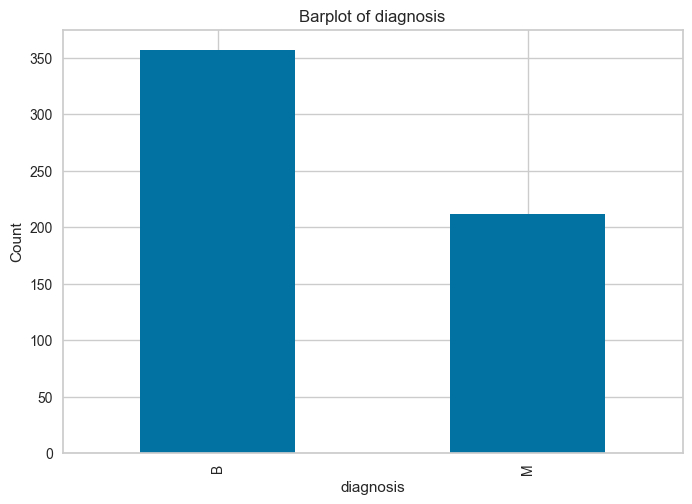

In [67]:
import matplotlib.pyplot as plt

# Step 3: Generate the barplot
value_counts = df['diagnosis'].value_counts()
value_counts.plot(kind='bar')

# Adding title and labels
plt.title('Barplot of diagnosis')
plt.xlabel('diagnosis')
plt.ylabel('Count')

# Display the plot
plt.show()

Observamos que las muestras estan balanceadas y que tenemos más representación de la categoría benigno (B) que de la categoría maligno (M).
Esto puede crear sesgos en el durante el entrenamiento del algoritmo supervisado del SVM que usaré para clasificar los pacientes entre B y M. No obstante se evaluaran las métricas de precision, recall y F1-score para determinar si dicho sesgo está ocurriendo.

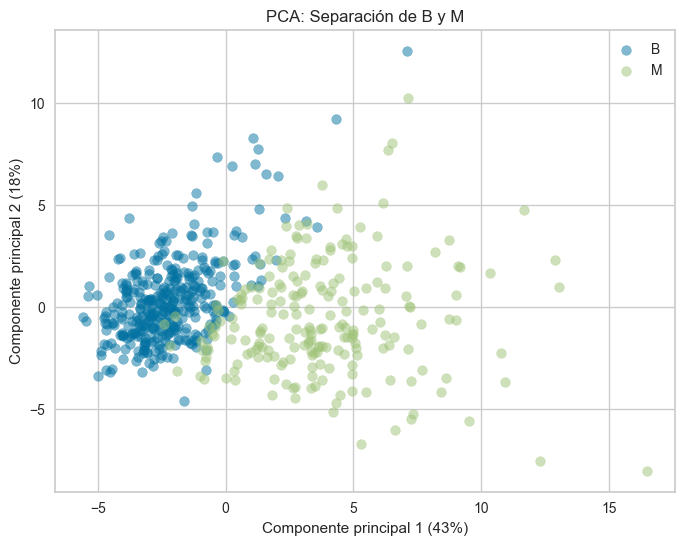

In [68]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Separamos variables de la columna objetivo
X = df.drop(columns=['diagnosis'])  # Variables
y = df['diagnosis']  # Objetivo

# Estandarizamos variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

explained_variance_ratio = pca.explained_variance_ratio_

# Plot
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[y == 'B', 0], X_pca[y == 'B', 1], label='B', alpha=0.5)
plt.scatter(X_pca[y == 'M', 0], X_pca[y == 'M', 1], label='M', alpha=0.5)
plt.xlabel(f'Componente principal 1 ({round(explained_variance_ratio[0]*100)}%)')
plt.ylabel(f'Componente principal 2 ({round(explained_variance_ratio[1]*100)}%)')
plt.title('PCA: Separación de B y M')
plt.legend()
plt.grid(True)
plt.show()


El PCA obtiene una varianza total explicada del 61% en los dos ejes representados. Esto es un porcentaje aceptable que permite apreciar a simple vista si las clases B y M se separan a simple vista. Se puede observar una clara diferenciación entre estas dos clases en el componente principal 1, que explica un 43% de la varianza, ya que si dibujamos una línea vertical en el valor 0 de este eje podemos separar y clasificar correctamente el grueso de nuestras muestras. Si dibujásemos una recta que pasase por el (0,0) con pendiente m = 1 obtendríamos una diagonal que separaría muy bien nuestras muestras.

## Implementación SVM <a class="anchor" id="3"></a>

### a) Partición del dataset <a class="anchor" id="4"></a>

In [69]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=12345)

# Estandarizar los datos 

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### b) Utilización del kernel lineal y el kernel RBF <a class="anchor" id="5"></a>

In [70]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Modelo SVM con kernel lineal
svm_linear = SVC(kernel='linear')
svm_linear.fit(X_train_scaled, y_train)

# Modelo SVM con kernel RBF
svm_rbf = SVC(kernel='rbf')
svm_rbf.fit(X_train_scaled, y_train)

# Predecir las clases en los datos del test
y_pred_linear = svm_linear.predict(X_test_scaled)
y_pred_rbf = svm_rbf.predict(X_test_scaled)

# Evaluar los modelos
print("Modelo SVM con Kernel Lineal:")
print(classification_report(y_test, y_pred_linear))

print("Modelo SVM con Kernel RBF:")
print(classification_report(y_test, y_pred_rbf))

Modelo SVM con Kernel Lineal:
              precision    recall  f1-score   support

           B       0.95      0.98      0.96       123
           M       0.95      0.91      0.93        65

    accuracy                           0.95       188
   macro avg       0.95      0.94      0.95       188
weighted avg       0.95      0.95      0.95       188

Modelo SVM con Kernel RBF:
              precision    recall  f1-score   support

           B       0.98      0.98      0.98       123
           M       0.95      0.95      0.95        65

    accuracy                           0.97       188
   macro avg       0.96      0.96      0.96       188
weighted avg       0.97      0.97      0.97       188



Aunque ambos modelos muestran un rendimiento muy alto ,>= 95% de accuracy, a la hora de clasificar las muestras de breast_cancer entre B y M. El SVM con Kernel RBF mustra un rendimiento ligeramente superior en las métricas de precision, recall, f1-score y accuracy. Esto indica que las muestras son clasificadas mejor usando un kernel no lineal.

### c) Implementación SVM con kernel lineal y 3-fold crossvalidation <a class="anchor" id="6"></a>

No usaré el paquete 'caret' porque no se encuentra disponible en python. Si bien es cierto que existe un paquete llamado pycaret, éste tiene funcionalidades diferentes al paquete de R, por lo tanto resoldré el ejercicio usando la librería scikit-learn 

In [71]:
from sklearn.model_selection import cross_val_score

svm = SVC(kernel='linear')

# Configurar GridSearchCV para 3-fold cross-validation
param_grid = {'C': [0.1, 1, 10, 100]}
grid_search = GridSearchCV(svm, param_grid, cv=3, verbose=1)

# Entrenar el modelo con validación cruzada
grid_search.fit(X_train_scaled, y_train)

# Obtener los mejores hiperparámetros
best_params = grid_search.best_params_
print("Mejores hiperparámetros:", best_params)

# Hacer predicciones en el conjunto de prueba
y_pred = grid_search.predict(X_test_scaled)

# Evaluar el rendimiento del modelo
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred))


# Validación cruzada con 3 folds en el conjunto de entrenamiento
cross_val_scores = cross_val_score(SVC(kernel='linear', C=best_params['C']), X_train_scaled, y_train, cv=3)
print("Accuracy de CrossFoldValidation 3 folds:", cross_val_scores)
print("Accuracy promedio de CrossFoldValidation:", cross_val_scores.mean())

Fitting 3 folds for each of 4 candidates, totalling 12 fits
Mejores hiperparámetros: {'C': 0.1}
Reporte de clasificación:
              precision    recall  f1-score   support

           B       0.98      0.98      0.98       123
           M       0.97      0.95      0.96        65

    accuracy                           0.97       188
   macro avg       0.97      0.97      0.97       188
weighted avg       0.97      0.97      0.97       188

Accuracy de CrossFoldValidation 3 folds: [0.98425197 0.99212598 0.96062992]
Accuracy promedio de CrossFoldValidation: 0.979002624671916


Aprovechando la implementación del CrossFoldValidation he realizado un gridsearch para la optimización del parámetro C. Cuyo valor óptimo es 0.1 de entre los otros valores testeados.

El CrossValidaton hace una validación cruzada iterando diferentes folds de train y test en el linear SVM y evalúa su rendimiento. Esto permite observar si durante el entrenamiento se producen sesgos en las predicciones debido a un fold concreto de datos. Como la accuracy de los 3 Folds es > 95% obtenemos de forma robusta un rendimiento muy alto por parte del linear SVM con un accuracy promedio de 97.8%.

### d) Evaluar el rendimiento del algoritmo SVM con kernel RBF para diferentes valores de los hiperparámeteros C y sigma <a class="anchor" id="7"></a>

In [72]:
# Definir los parámetros a explorar
C_range = np.linspace(0.1, 2)
gamma_range = np.linspace(0.005, 0.5) # el parámetro gamma en scikit-learn equivale al parámetro sigma de caret en R

param_grid = {'C': C_range, 'gamma': gamma_range}

# Configurar el modelo SVM con kernel RBF
svm_rbf = SVC(kernel='rbf')

# Configurar GridSearchCV para realizar la búsqueda en cuadrícula con validación cruzada
grid_search = GridSearchCV(svm_rbf, param_grid, cv=3, verbose=1, n_jobs=-1, scoring='accuracy')

# Entrenar el modelo con GridSearchCV
grid_search.fit(X_train_scaled, y_train)

# Obtener los mejores hiperparámetros
best_params = grid_search.best_params_
print("Mejores hiperparámetros:", best_params)

y_pred = grid_search.predict(X_test_scaled)

# Evaluar el rendimiento del modelo
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred))

Fitting 3 folds for each of 2500 candidates, totalling 7500 fits
Mejores hiperparámetros: {'C': 1.379591836734694, 'gamma': 0.015102040816326531}
Reporte de clasificación:
              precision    recall  f1-score   support

           B       0.98      0.98      0.98       123
           M       0.97      0.97      0.97        65

    accuracy                           0.98       188
   macro avg       0.98      0.98      0.98       188
weighted avg       0.98      0.98      0.98       188



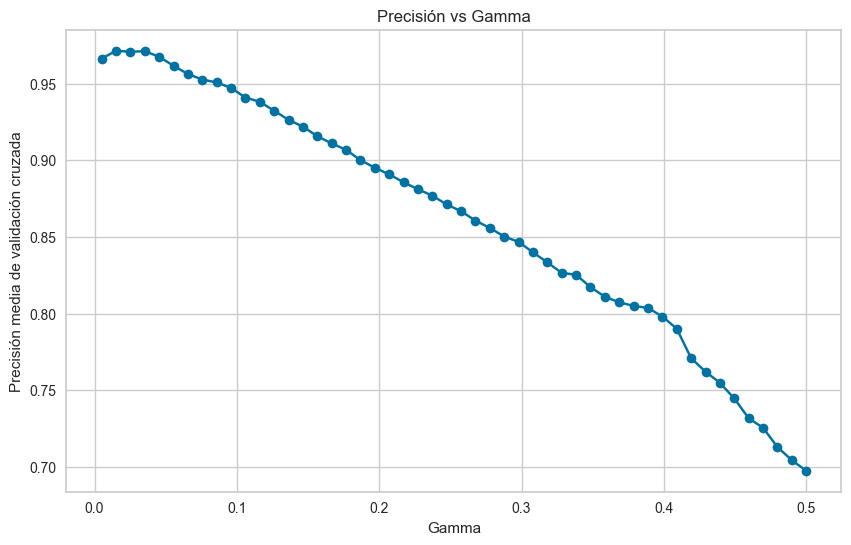

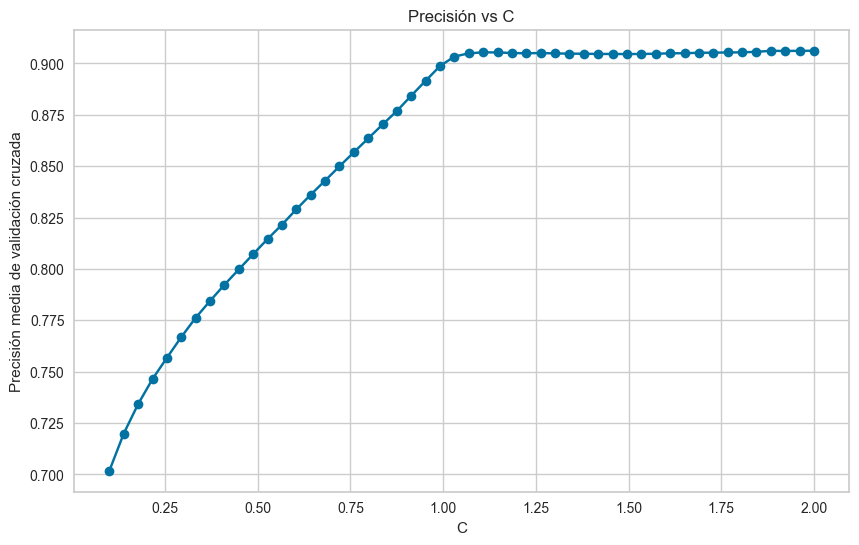

In [73]:
# Obtener accuracy medio para gamma
mean_scores_gamma = np.mean(mean_scores, axis=0)

# Gráfico para gamma
plt.figure(figsize=(10, 6))
plt.plot(gamma_range, mean_scores_gamma, marker='o')
plt.title('Precisión vs Gamma')
plt.xlabel('Gamma')
plt.ylabel('Precisión media de validación cruzada')
plt.grid(True)
plt.show()

# Obtener accuracy medio para C
mean_scores_C = np.mean(mean_scores, axis=1)

# Gráfico para C
plt.figure(figsize=(10, 6))
plt.plot(C_range, mean_scores_C, marker='o')
plt.title('Precisión vs C')
plt.xlabel('C')
plt.ylabel('Precisión media de validación cruzada')
plt.grid(True)
plt.show()

En estos dos graficos se puede ver la evolución de la Accuracy del SVM en función del valor de gamma (en el primer grafico) o C (en el segundo grafico).
En el caso de la gamma el valor de Accuracy máximo se obtiene en torno a 0.015, a partir de aquí si aumentamos el valor de gamma la Accuracy disminuye.
En el caso de C el valor óptimo se encuentra en  1.38. A partir de aquí la Accuracy se estabiliza aunque aumentemos el valor de C. En cambio si lo disminuimos la Accuracy disminuye.

Por lo tanto, la combinación óptima de hipermarámetros para este SVM es de gamma = 0.015 y C = 1.38.

### e) Tabla resumen de los diferentes modelos y sus rendimientos <a class="anchor" id="8"></a>

In [74]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

results = {}

svm_rbf = SVC(kernel='rbf',C=1.379591836734694,gamma=0.015102040816326531)
svm_rbf.fit(X_train_scaled, y_train)

y_pred_svm_rbf = svm_rbf.predict(X_test_scaled)

svm_rbf_scores = {
    'Accuracy': accuracy_score(y_test, y_pred_svm_rbf),
    'Precision': precision_score(y_test, y_pred_svm_rbf,pos_label='B'),
    'Recall': recall_score(y_test, y_pred_svm_rbf,pos_label='B'),
    'F1 Score': f1_score(y_test, y_pred_svm_rbf,pos_label='B')
}
results['SVM with RBF Kernel'] = svm_rbf_scores

svm_linear = SVC(kernel='linear',C=0.1)
svm_linear.fit(X_train_scaled, y_train)

y_pred_svm_linear = svm_linear.predict(X_test_scaled)
svm_linear_scores = {
    'Accuracy': accuracy_score(y_test, y_pred_svm_linear),
    'Precision': precision_score(y_test, y_pred_svm_linear,pos_label='B'),
    'Recall': recall_score(y_test, y_pred_svm_linear,pos_label='B'),
    'F1 Score': f1_score(y_test, y_pred_svm_linear,pos_label='B')
}

results['SVM with Linear Kernel'] = svm_linear_scores


results_df = pd.DataFrame(results).T
results_df

,Accuracy,Precision,Recall,F1 Score
SVM with RBF Kernel,0.978723,0.983740,0.98374,0.983740
SVM with Linear Kernel,0.973404,0.975806,0.98374,0.979757


En la tabla se muestra el rendimiento de los modelos SVM con kernel RBF y con kernel lineal. Ambos modelos tienen un alto rendimiento en términos de accuracy, precision, recall y F1-score. El modelo SVM con kernel RBF tiene ligeramente mejores métricas de precisión y F1 Score en comparación con el modelo de kernel lineal, mientras que ambos modelos tienen un recall similar. En general, ambos modelos son efectivos en la clasificación de datos, con el modelo SVM con kernel RBF mostrando un rendimiento ligeramente superior en algunas métricas.

### f) SVM coordenadas PCA <a class="anchor" id="9"></a>>

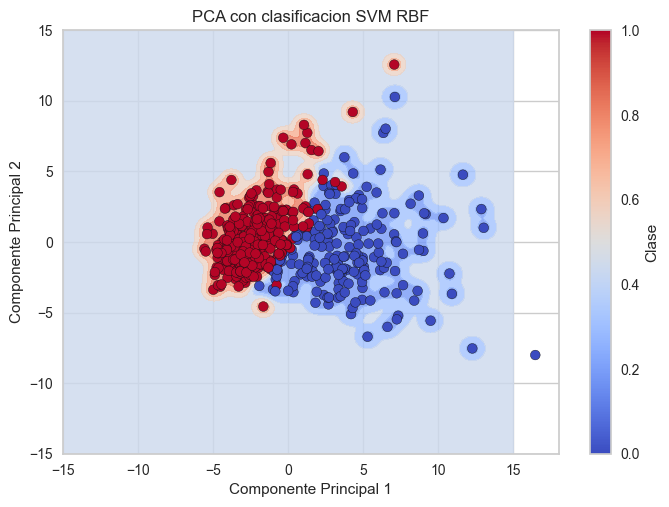

In [75]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.decomposition import PCA


# Convertir las etiquetas 'M' y 'B' a valores numéricos
y_numeric = np.where(y == 'M', 0, 1)

# Entrenar el SVM con kernel RBF utilizando C=1 y sigma=2.2
svm_rbf = SVC(kernel='rbf', C=1, gamma=2.2)
svm_rbf.fit(X_pca, y_numeric)  # Aquí utilizamos las etiquetas numéricas

# Generar una malla de valores para representar el gráfico de contorno
x_values = np.linspace(-15, 15, 300)
y_values = np.linspace(-15, 15, 300)
xx, yy = np.meshgrid(x_values, y_values)

# Calcular los valores de clasificación para cada punto en la malla
Z = svm_rbf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Grafico el contorno de la función de clasificación
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

# Grafico de las observaciones en las dos primeras componentes del PCA con colores basados en las etiquetas numéricas
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_numeric, cmap=plt.cm.coolwarm, edgecolors='k')

plt.title('PCA con clasificacion SVM RBF')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.colorbar(label='Clase')
plt.show()


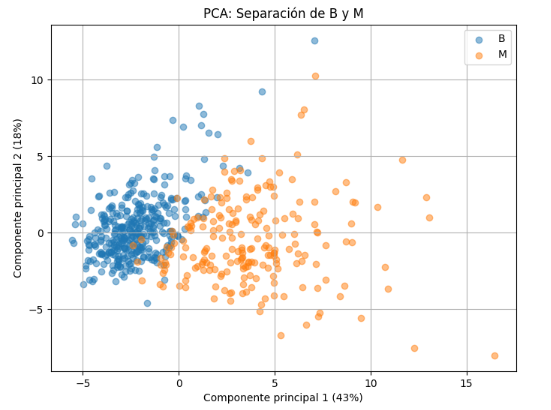

En el primer gráfico se puede ver el resultado de la clasificación de las muestras a partir de los datos de las coordenadas del PCA con un SVM con kernel RBF. Si se compara con el PCA del ejercicio 2 se observa que la separación de las muestras es muy parecida a simple vista y que estableciendo una recta divisioria en el (0,0) con m=1 lograríamos clasificar correctamente la mayoría de nuestras muestras, no obstante, al no poder clasificar todos los puntos correctamente con un método lineal, observamos como la utilización de un kernel no lineal (RBF) permite clasificar correctamente puntos que no respetan la separación lineal. 

Esto explica por qué el SVM con kernel RBF tiene un rendimiento ligeramente superior al lineal, debido a que el RBF tiene una mayor flexibilidad y es capaz de clasificar correctamente aquellos puntos que no respetan una separación lineal.